# Uncertainty Visualization Demo
In this demo we will review different methods for visualizing uncertainty. We’ll use the palmerspenguins data for the demo.


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
penguins = pd.read_csv("palmerpenguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Probability Distributions
First, let’s generate a normal probability distribution of `mean bill_length_mm`.

<Axes: xlabel='bill_length_mm', ylabel='Density'>

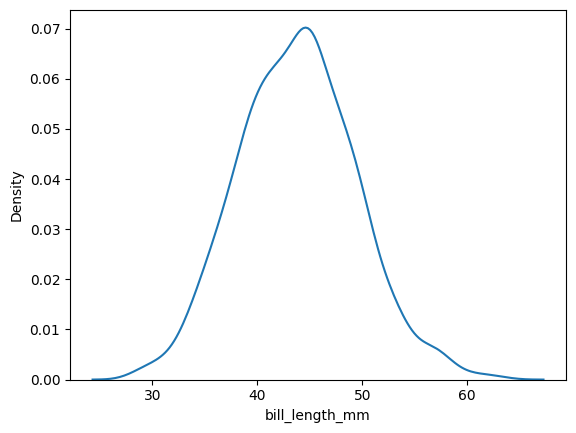

In [13]:
bill_mean = penguins.bill_length_mm.mean()
bill_sd = penguins.bill_length_mm.std()

# generate normal distribution from mean and sd 
bill_norm = pd.DataFrame(dict(bill_length_mm = np.random.normal(bill_mean, bill_sd, 1000)))

sns.kdeplot(bill_norm['bill_length_mm'])

We can also look at the distribution of `bill_length_mm` in our original dataset.

<Axes: xlabel='bill_length_mm', ylabel='Density'>

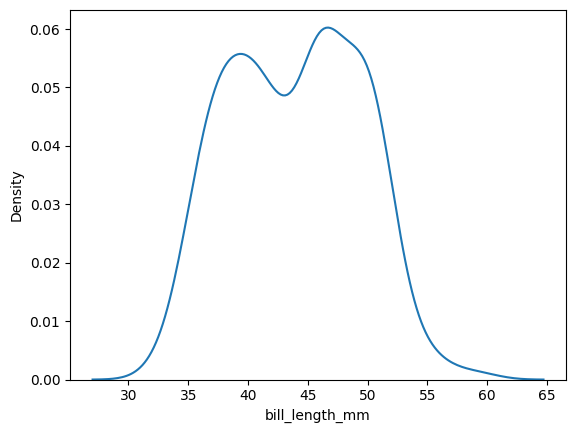

In [14]:
sns.kdeplot(penguins['bill_length_mm'])

Interesting, maybe our data is bimodal?

### Violins

Alternatively, we could use violin plots to show distribution by species.

<Axes: xlabel='species', ylabel='bill_length_mm'>

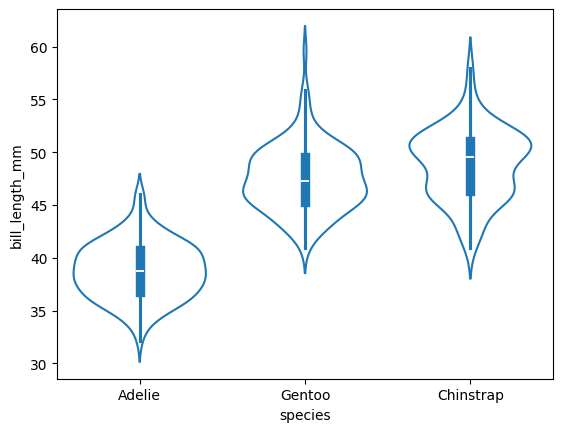

In [24]:
sns.violinplot(data = penguins, x = "species", y = "bill_length_mm", fill = False)

Hmmm... maybe only two species are bimodal?

## Showing Uncertainty for Multiple Points on a Plot

Now, let's look at something a little more interesting. Let's say we want to look at mean bill length by species. We can do this with a bar chart: 

<Axes: xlabel='species', ylabel='bill_length_mm'>

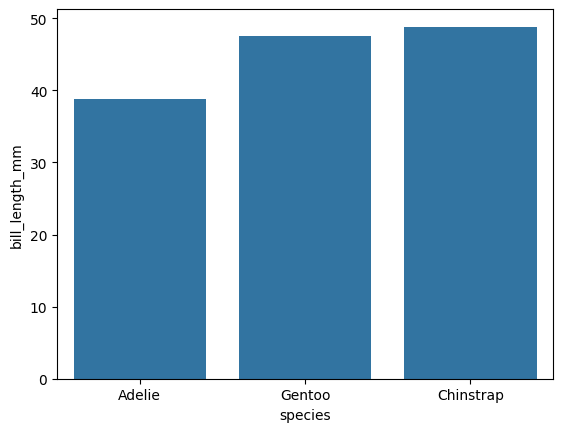

In [37]:
sns.barplot(x = 'species', y = 'bill_length_mm', data = penguins, estimator = np.mean, errorbar = ('ci', 0))

#### Error Bars 

But a bar chart alone won't show the uncertainty in means. Let's add errror bars:

<Axes: xlabel='species', ylabel='bill_length_mm'>

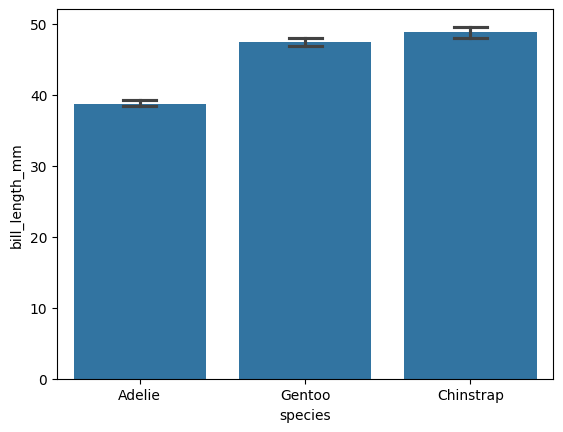

In [38]:
sns.barplot(x = 'species', y = 'bill_length_mm', data = penguins, estimator = np.mean, errorbar = ('ci', 95), capsize = 0.2)

Try making the bars show up as crossbars, lineranges, and pointranges as well. 


## Challenge

Hypothetical Outcome Plots show uncertainty through animation that moves between possible outcomes. For example, a HOP that shows mean `bill_length_mm` by `species`, might show a bar for each `species` that varies in height from `mean - sd` to `mean + sd`, according to probabilities from a normal distribution.

Your task for the last part of this demo is to try to make a HOP version of the bar chart above. You will need to do some data wrangling, and then look into animation. I recommend starting by clearly mapping out your plan for implementing a HOP. Then, generate the data you will need, and finally look at gganimate to help you animate your plot.